<a href="https://colab.research.google.com/github/Yashasvi-30/Pattern-Recognition-Lab-Codes/blob/main/PatternRecognition_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from mlxtend.plotting import plot_decision_regions

In [2]:
# Load the dataset
pulsar_df = pd.read_csv('pulsar_stars.csv')

# Display basic info
pulsar_df.info()
print(pulsar_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
    Me

In [3]:
# Rename columns to remove leading/trailing spaces
pulsar_df.columns = pulsar_df.columns.str.strip()

# Define features and target
X = pulsar_df.drop('target_class', axis=1)
y = pulsar_df['target_class']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Function to train and evaluate SVM with different kernels
def train_and_evaluate_svm(kernel_type):
    model = SVC(kernel=kernel_type)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"Kernel: {kernel_type}")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("="*50)
    return model

# Train and evaluate SVM for each kernel
svm_linear = train_and_evaluate_svm('linear')
svm_rbf = train_and_evaluate_svm('rbf')
svm_poly = train_and_evaluate_svm('poly')
svm_sigmoid = train_and_evaluate_svm('sigmoid')


Kernel: linear
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.94      0.81      0.87       321

    accuracy                           0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580

Accuracy: 0.9787709497206704
Kernel: rbf
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.94      0.83      0.88       321

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580

Accuracy: 0.979608938547486
Kernel: poly
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.95      0.80      0.87       321

    accuracy                           0.98      3580
   macro avg       0.97      0.

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')


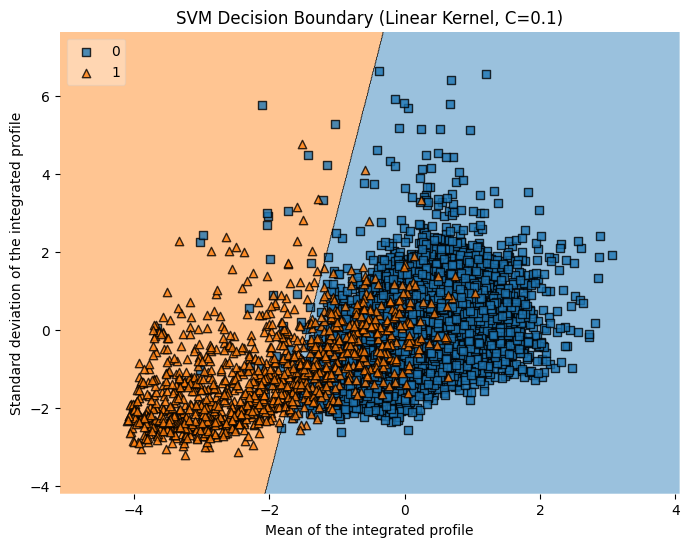

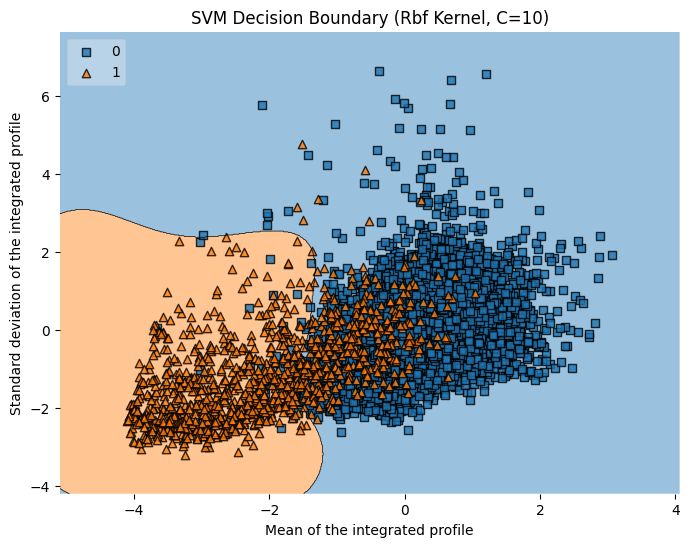

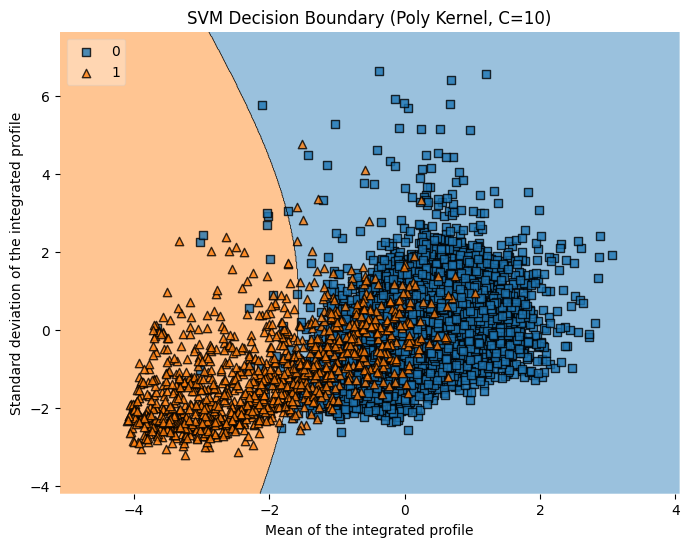

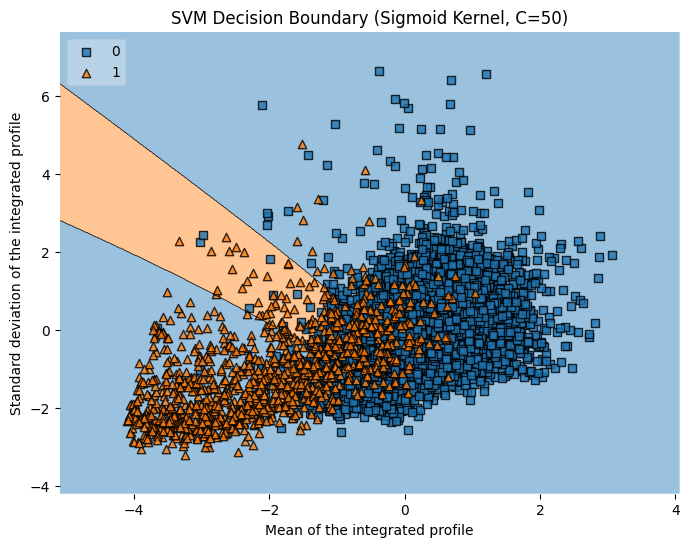

In [5]:
pulsar_df.columns = pulsar_df.columns.str.strip()

# Confirm cleaned column names
print(pulsar_df.columns)

# Select the first two features for visualization
X = pulsar_df.iloc[:, [0, 1]].values    # Convert to NumPy array
y = pulsar_df['target_class'].values    # Convert to NumPy array

# Split the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to train and visualize SVM hyperplanes
def plot_svm_hyperplane(kernel_type, C_value):
    model = SVC(kernel=kernel_type, C=C_value)
    model.fit(X_train, y_train)

    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_train, y_train, clf=model, legend=2)
    plt.title(f"SVM Decision Boundary ({kernel_type.capitalize()} Kernel, C={C_value})")
    plt.xlabel(pulsar_df.columns[0])  # Dynamic feature names
    plt.ylabel(pulsar_df.columns[1])  # Dynamic feature names
    plt.show()

# Train and plot for each kernel with the specified C values
plot_svm_hyperplane('linear', 0.1)      # Linear kernel with C=0.1
plot_svm_hyperplane('rbf', 10)         # RBF kernel with C=10
plot_svm_hyperplane('poly', 10)       # Polynomial kernel with C=100
plot_svm_hyperplane('sigmoid', 50)    # Sigmoid kernel with C=500

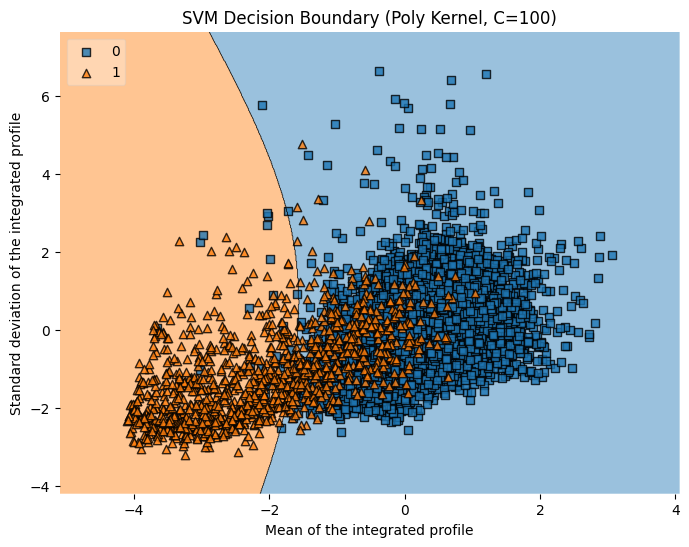

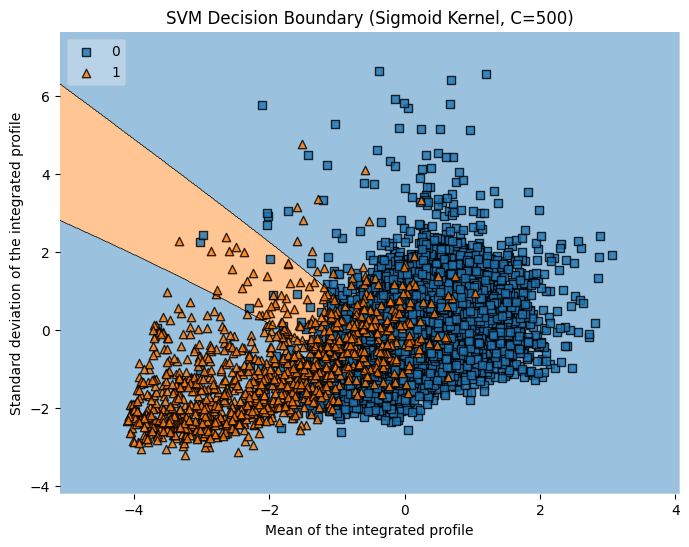

In [7]:
plot_svm_hyperplane('poly', 100)       # Polynomial kernel with C=100
plot_svm_hyperplane('sigmoid', 500)    # Sigmoid kernel with C=500